<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-4/4_Data_Visualization_2_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Lecture 4 - Data Visualization - Diamonds Dataset

---

*   Sulthan Nauval Abdillah
*   1103213065
*   Link ChatGPT : [link text]()


In [1]:
import pandas as pd

# Membaca file CSV dan membuat DataFrame
df = pd.read_csv("/content/drive/MyDrive/Datasets/vgsales.csv")

# Feature Statistic

In [10]:
print(df.describe())

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


#Pie Chart

Prompt ChatGPT : "saya menggunakan dataset vgsales.csv buatkan pie chart untuk Top 10 Platform yang digunakan!"

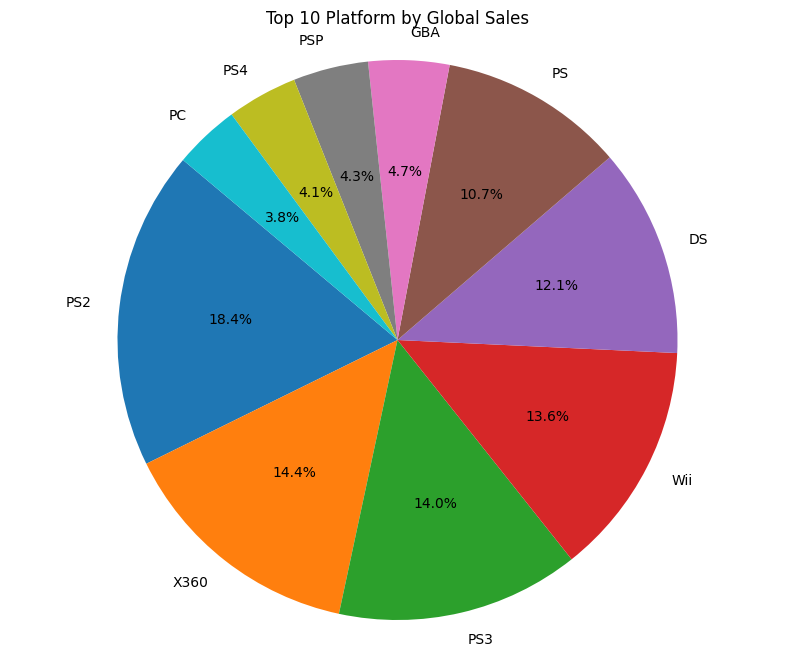

In [2]:
import matplotlib.pyplot as plt

# Menghitung jumlah penjualan global untuk setiap platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().nlargest(10)

# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(platform_sales, labels=platform_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Platform by Global Sales')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

#Bar Chart

Prompt ChatGPT : "buatkan code untuk menampilkan bar chart untuk jumlah aplikasi per genre"

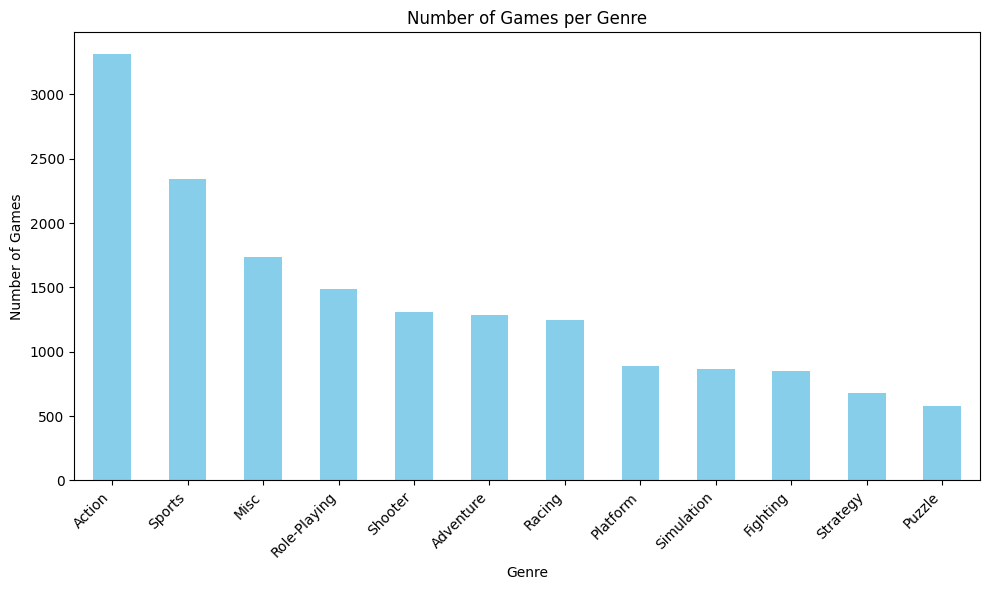

In [5]:
# Menghitung jumlah aplikasi per genre
genre_counts = df['Genre'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')  # Rotasi label genre agar lebih mudah dibaca
plt.tight_layout()
plt.show()

#Line Graph

Prompt ChatGPT : "buatkan code untuk menampilkan line graph untuk Jumlah Game Genre Sport yang Rilis per Tahun"

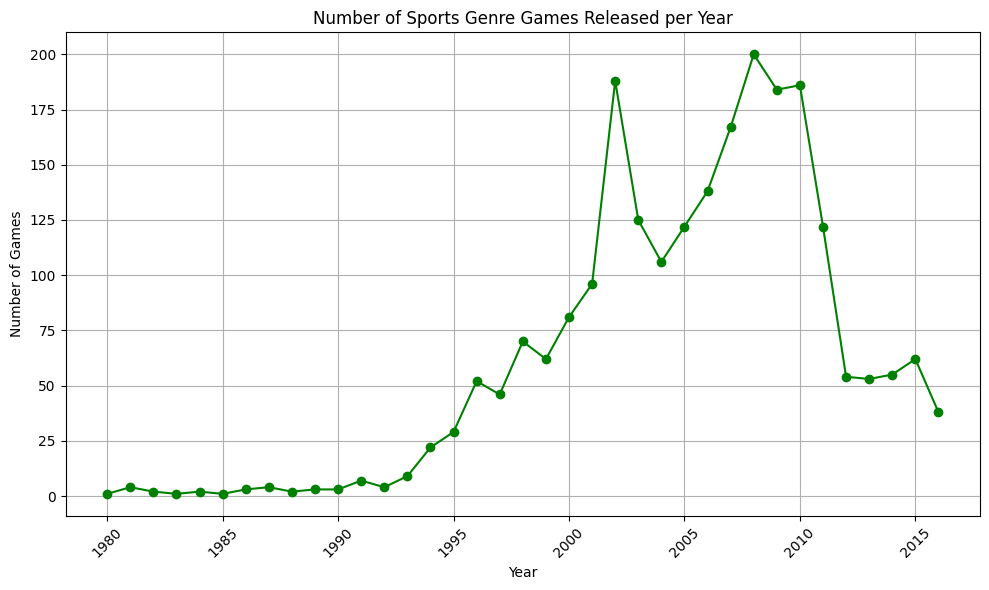

In [6]:
# Mengambil data hanya untuk genre Sport
sport_df = df[df['Genre'] == 'Sports']

# Menghitung jumlah game genre Sport yang dirilis per tahun
sport_year_counts = sport_df.groupby('Year')['Name'].count()

# Membuat line graph
plt.figure(figsize=(10, 6))
sport_year_counts.plot(kind='line', marker='o', color='green')
plt.title('Number of Sports Genre Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Box Plot

Prompt ChatGPT : "beri code untuk menampilkan boxplot untuk masing masing fitur numerik (masing-masing fitur ada boxplot sendiri)"

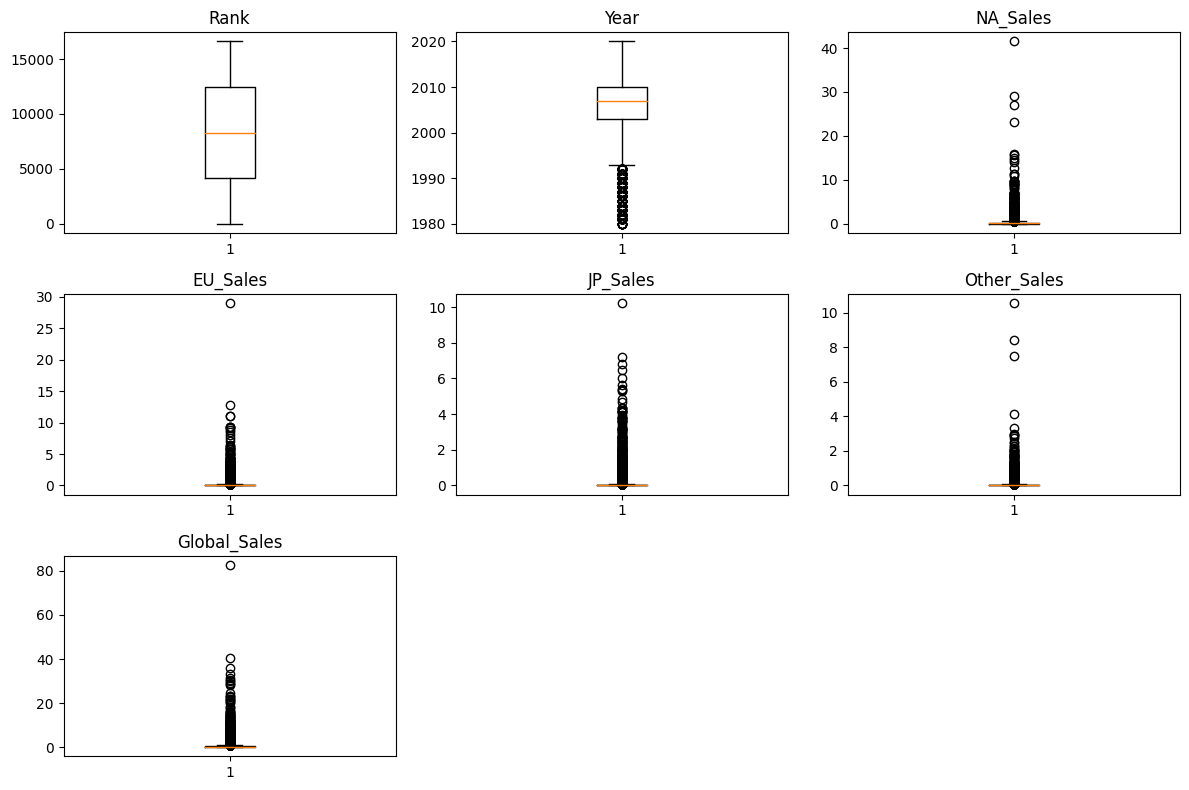

In [9]:
import seaborn as sns

# Memilih kolom-kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat boxplot untuk setiap fitur numerik
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.tight_layout()

plt.show()

# Scatter Plot

Prompt ChatGPT : "buat code untuk menampilkan scatterplot dari tiap fitur numerik"

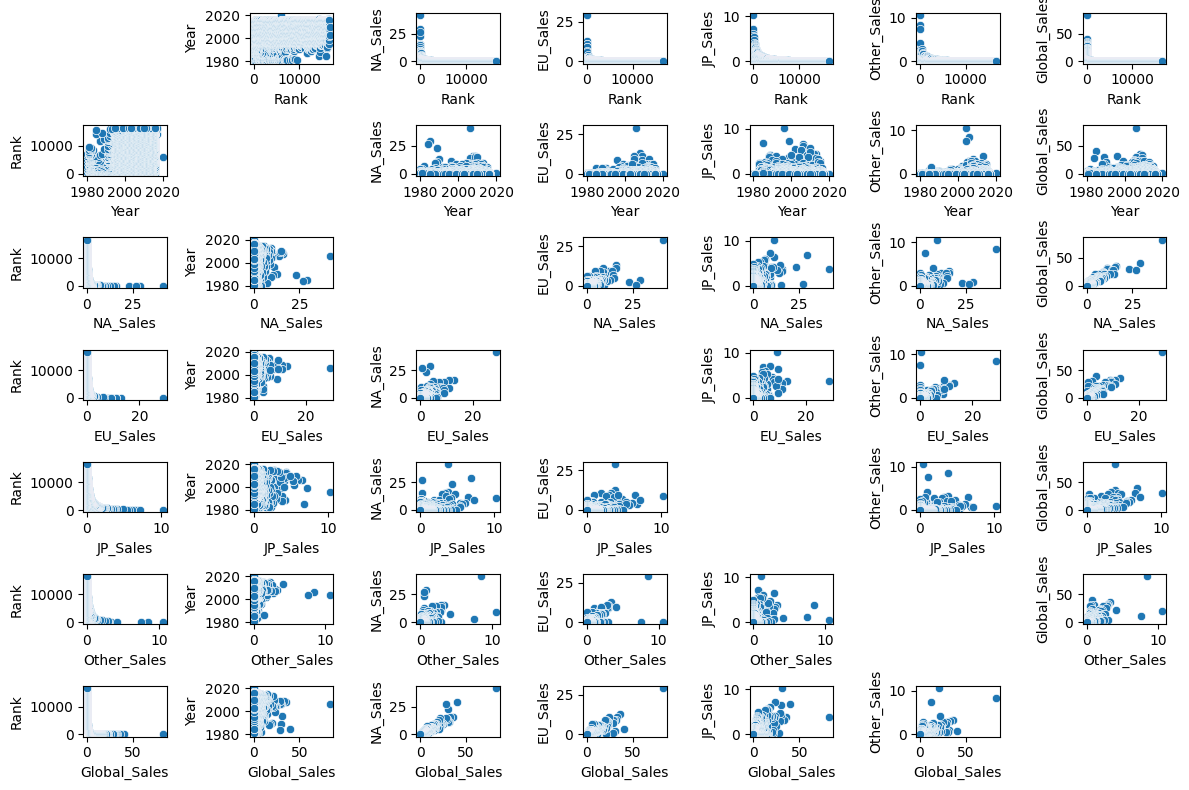

In [13]:
# Memilih kolom-kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Membuat scatterplot untuk setiap pasangan fitur numerik
plt.figure(figsize=(12, 8))
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        if i != j:
            plt.subplot(len(numeric_columns), len(numeric_columns), i * len(numeric_columns) + j + 1)
            sns.scatterplot(data=df, x=col1, y=col2)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.tight_layout()

plt.show()

# Heat Map

Prompt ChatGPT : "beri code untuk menampilkan heatmap dari fitur2 numerik!"

<ipython-input-14-65a87bd4bb74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


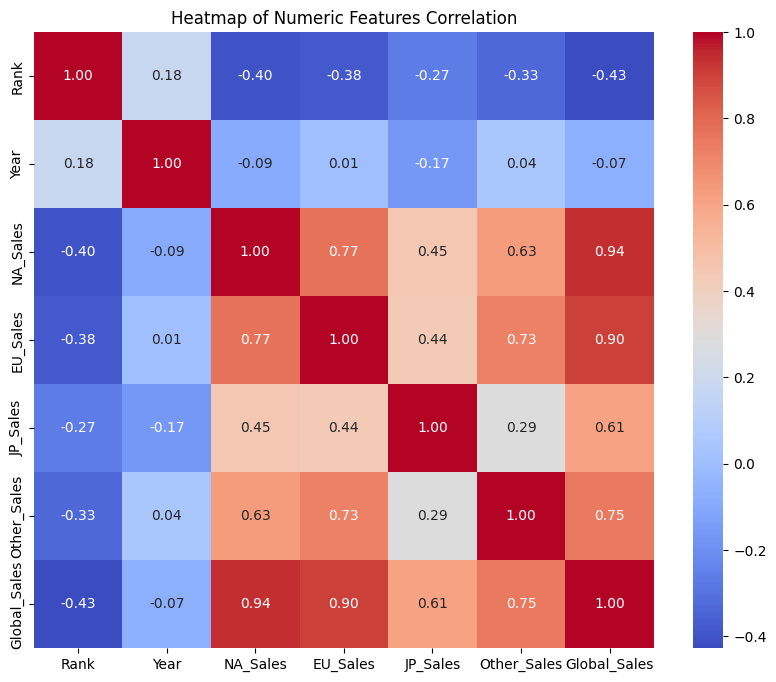

In [14]:
# Menghitung korelasi antara fitur numerik
correlation_matrix = df.corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numeric Features Correlation')
plt.show()